# Seaborn graphics

[Seaborn](http://stanford.edu/~mwaskom/software/seaborn/) is a Python library with *"a high-level interface for drawing attractive statistical graphics"*. This notebook includes some examples taken from the [Seaborn example gallery](http://stanford.edu/~mwaskom/software/seaborn/examples/index.html).

In [1]:
# The imports
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

## Example 1: interactplot

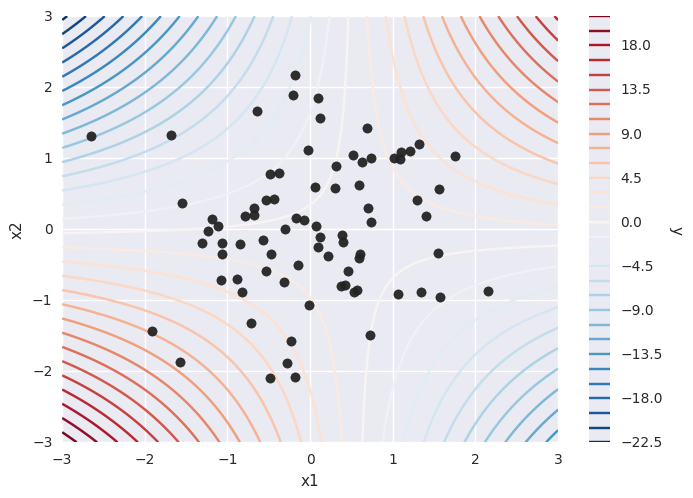

In [2]:
# Generate a random dataset with strong simple effects and an interaction
n = 80
rs = np.random.RandomState(11)
x1 = rs.randn(n)
x2 = x1 / 5 + rs.randn(n)
b0, b1, b2, b3 = .5, .25, -1, 2
y = b0  + b1 * x1 + b2 * x2 + b3 * x1 * x2 + rs.randn(n)
df = pd.DataFrame(np.c_[x1, x2, y], columns=["x1", "x2", "y"])

# Show a scatterplot of the predictors with the estimated model surface
sns.interactplot("x1", "x2", "y", df);

## Example 2: Correlation matrix heatmap

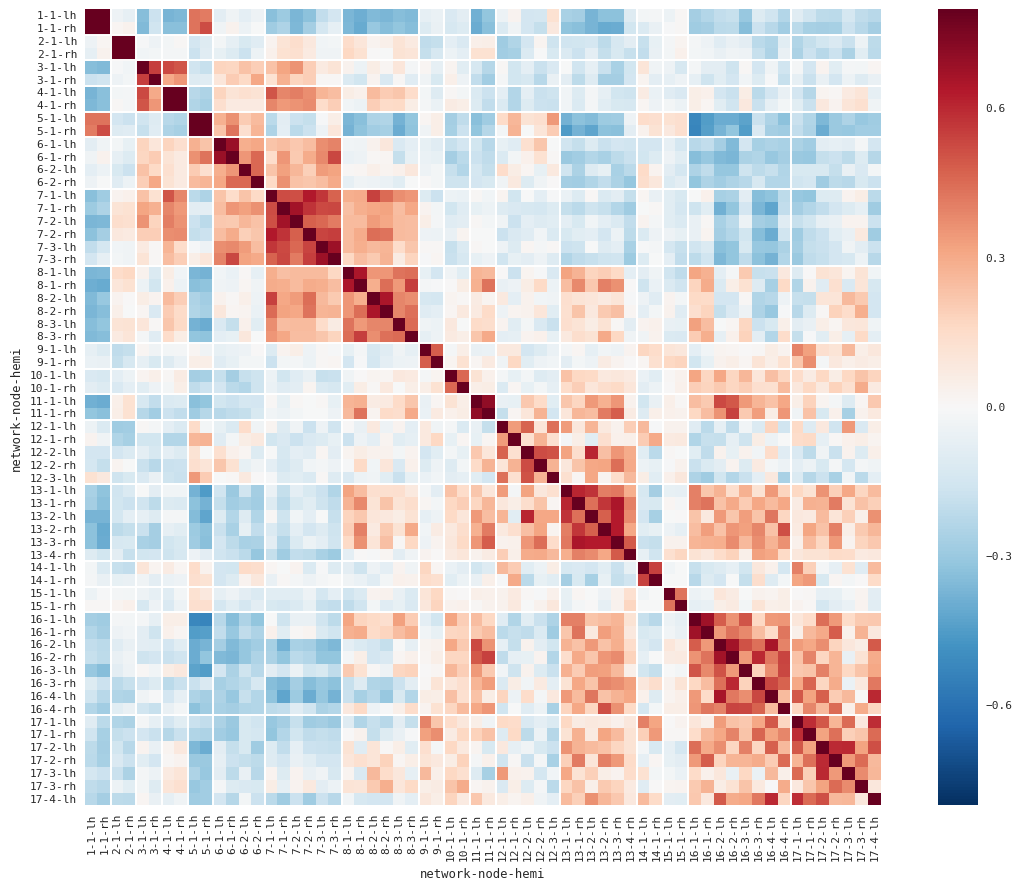

In [3]:
sns.set(context="paper", font="monospace")

# Load the datset of correlations between cortical brain networks
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)
corrmat = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots( figsize=(12, 9) )

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

# Use matplotlib directly to emphasize known networks
networks = corrmat.columns.get_level_values("network")
for i, network in enumerate(networks):
    if i and network != networks[i - 1]:
        ax.axhline(len(networks) - i, c="w")
        ax.axvline(i, c="w")
f.tight_layout()


## Example 3: Linear regression with marginal distributions

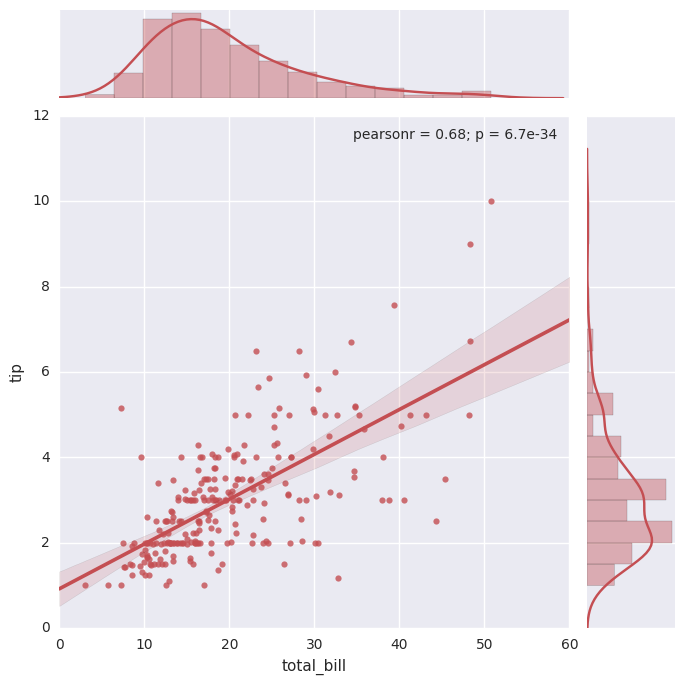

In [4]:
sns.set(style="darkgrid", color_codes=True)

tips = sns.load_dataset("tips")
g = sns.jointplot("total_bill", "tip", data=tips, kind="reg",
                  xlim=(0, 60), ylim=(0, 12), color="r", size=7)


## Interactivity

We repeat the above example, but now using mpld3 to provide pan & zoom interactivity.
Note that this may not work if graphics have already been initialized

In [5]:
# Seaborn + interactivity through mpld3
import mpld3
sns.set( style="darkgrid", color_codes=True )

tips = sns.load_dataset("tips")
sns.jointplot( "total_bill", "tip", data=tips, kind="reg",
                  xlim=(0, 60), ylim=(0, 12), color="r", size=7 )


mpld3.display()